<a href="https://colab.research.google.com/github/navroz-lamba/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [1]:
!curl https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
62,No,Employed full-time,"Computer science, computer engineering, or software engineering",Back-end developer;Data scientist or machine learning specialist;DevOps specialist;Educator or academic researcher;QA or test developer;System administrator,12-14 years,6-8 years,120000.0,"Taken an online course in programming or software development (e.g. a MOOC);Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or software development;Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course;Participated in a hackathon;Contributed to open source software","The official documentation and/or standards for the technology;A book or e-book from O’Reilly, Apress, or a similar publis

In [3]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
print(df.shape)
df.head(5)

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [31]:
sample1 = df.sample(20, random_state=42)
sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [32]:
x_bar_sample1 = sample1['ConvertedSalary'].mean()
x_bar_sample1

55752.2

In [33]:
x_bar_sample2 = sample2['ConvertedSalary'].mean()
x_bar_sample2

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust sample 2 more because of the bigger sample size. Non-technical audience will not have any idea about one of the two samples being better. 

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Just the point estimate does not indicate about any possible sampling error there could be with these estimates.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



we could use **confidence intervals/ margin of error** to give non-technical
readers an idea about how far off our estimates might be due to the sampling error.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [224]:
def confidence_interval(sample, confidence_int):

# to make sure we get an array 
  data = np.array(sample)

# Confidence_interval = x_bar +- t*(s/sgrt(n))

# calculating std dev(s) on the sample and sqrt of the sample size(n)
  s = np.std(data, ddof=1)
  n = np.sqrt(data.shape[0])

# calculating t using stats 
  t = stats.t.ppf((1-(1-confidence_int)/2), n-1)

# calculating margin of error t*(s/sgrt(n))
  moe = t * ( s / np.sqrt(n) )

# calculating mean of the sample 
  x_bar = data.mean()

  upper_bound = x_bar + moe
  lower_bound = x_bar - moe 

  return(upper_bound, x_bar, lower_bound, moe)

In [212]:
# with 20 samples 
CI_sample1 = confidence_interval(sample1['ConvertedSalary'], 0.95)
CI_sample1

(115228.99426182563, 55752.2, -3724.594261825645, 59476.79426182564)

In [213]:
# with 200 samples
CI_sample2 = confidence_interval(sample2['ConvertedSalary'], 0.95)
CI_sample2

(101302.31975320612, 68551.255, 35800.19024679389, 32751.064753206116)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [77]:
mean_moe_sample1 = confidence_interval(sample1['ConvertedSalary'], 0.95)
print(f'Sample Mean: {mean_moe_sample1[1]}\nMargin Error: {mean_moe_sample1[3]}')

Sample Mean: 55752.2
Margin Error: 59476.79426182564


In [78]:
mean_moe_sample2 = confidence_interval(sample2['ConvertedSalary'], 0.95)
print(f'Sample Mean: {mean_moe_sample2[1]}\nMargin Error: {mean_moe_sample2[3]}')

Sample Mean: 68551.255
Margin Error: 32751.064753206116


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

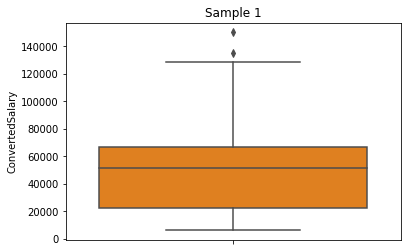

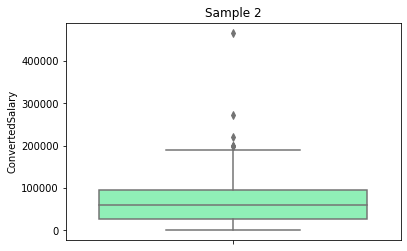

In [82]:
# plotting boxplot to look for outliers in the 2 different sample sizes 

sns.boxplot(y='ConvertedSalary', data=sample1, palette='autumn')
plt.title('Sample 1')
plt.show()


sns.boxplot(y='ConvertedSalary', data=sample2, palette='rainbow')
plt.title('Sample 2')
plt.show()

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

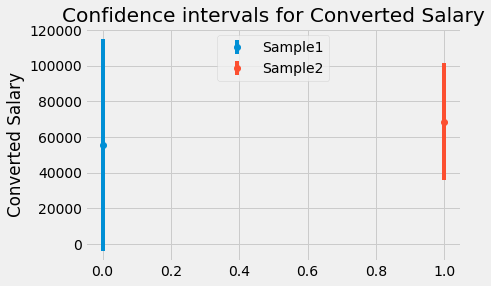

In [120]:
plt.style.use('fivethirtyeight')
plt.errorbar(0, CI_sample1[1], yerr=CI_sample1[3], fmt='o', label='Sample1')
plt.errorbar(1, CI_sample2[1], yerr=CI_sample2[3], fmt='o', label='Sample2')
plt.ylabel('Converted Salary')
plt.legend(loc='upper center')
plt.title('Confidence intervals for Converted Salary')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

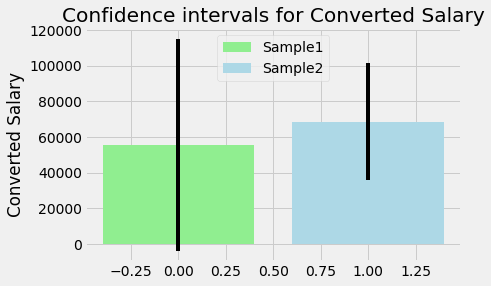

In [119]:
plt.style.use('fivethirtyeight')
plt.bar(0, height=CI_sample1[1], yerr=CI_sample1[3], label='Sample1', color='lightgreen')
plt.bar(1, height=CI_sample2[1], yerr=CI_sample2[3], label='Sample2', color='lightblue')
plt.ylabel('Converted Salary')
plt.legend(loc='upper center')
plt.title('Confidence intervals for Converted Salary')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [122]:
# calling out the confidence_interval function on the entire dataset
CI_df = confidence_interval(df['ConvertedSalary'], .95)
CI_df

(89432.42037307486, 73453.40420137631, 57474.38802967777, 15979.016171698539)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision means how tight the confidence is around the point estimate. In other words how consistent the results are when measurements are repeated. 

Accuracy means how close are the estimates to the true value.  

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

95% of the confidence intervals calculated from the random samples will contain the true population mean.
If you conducted your study 100 times you would produce 100 different confidence intervals. We would expect that 95 out of those 100 confidence intervals will contain the true population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [311]:
# 1.a Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
CI_sample2 = confidence_interval(sample2['ConvertedSalary'], 0.95)
print(f'Sample mean: {CI_sample2[1]}\n\nMargin of Error: {CI_sample2[3]}\n\nUpper Bound: {CI_sample2[0]}\n\nLower Bound: {CI_sample2[2]}')

Sample mean: 68551.255

Margin of Error: 32751.064753206116

Upper Bound: 101302.31975320612

Lower Bound: 35800.19024679389


In [327]:
#1.b Run a 1-sample t-test with the null hypothesis value being just barely outside of the confidence interval. What is the p-value?
stats.ttest_1samp(sample2['ConvertedSalary'], 34000)

Ttest_1sampResult(statistic=8.561434241546722, pvalue=3.021308689827681e-15)

In [329]:
#1.c Run a 1-sample t-test with the null hypothesis value being just barely outside of the confidence interval. What is the p-value?
stats.ttest_1samp(sample2['ConvertedSalary'], 100000.0)

Ttest_1sampResult(statistic=-7.792665195422604, pvalue=3.5676416341513047e-13)

In [126]:
# STRETCH GOAL 2

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-07-15 22:52:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-07-15 22:52:21 (279 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [269]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers, na_values="?")

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,...,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,...,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,...,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,...,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,...,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,...,n,y,NaN,y,y,y,y


In [270]:
# to convert the df into integers so we could calculate mean
df = df.replace({'y': 1, 'n': 0})


In [271]:
# filtering republicans
rep = df[df['party']=='republican']

In [272]:
# filling NaN values 
rep = rep.fillna(method='bfill')

In [273]:
# using mode() to fill the last row 
rep['duty-free'] = rep['duty-free'].fillna(rep['duty-free'].mode()[0])

In [274]:
rep.isna().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [231]:
def confidence_intervals_dataframe(df, confidence_int):  

  for col in df.iloc[:,1:]:
  # Confidence_interval = x_bar +- t*(s/sgrt(n))

  # calculating std dev(s) on the sample and sqrt of the sample size(n)
    s = np.std(df[col], ddof=1)
    n = np.sqrt(df[col].shape[0])

  # calculating t using stats 
    t = stats.t.ppf((1-(1-confidence_int)/2), n-1)

  # calculating margin of error t*(s/sgrt(n))
    moe = t * ( s / np.sqrt(n) )

  # calculating mean of the sample 
    x_bar = df[col].mean()

    upper_bound = x_bar + moe
    lower_bound = x_bar - moe 


    print(f'{col}:\nUpper Bound: {upper_bound}\n Mean: {x_bar}\nLower Bound: {lower_bound}\nMargin Of Error: {moe}\n')

In [277]:
CI_df1 = confidence_intervals_dataframe(rep, 0.95)
CI_df1

handicapped-infants:
Upper Bound: 0.42006994849224377
 Mean: 0.18452380952380953
Lower Bound: -0.05102232944462473
Margin Of Error: 0.23554613896843427

water-project:
Upper Bound: 0.8154273460452552
 Mean: 0.5119047619047619
Lower Bound: 0.20838217776426854
Margin Of Error: 0.3035225841404933

budget:
Upper Bound: 0.3357960884333757
 Mean: 0.13095238095238096
Lower Bound: -0.0738913265286138
Margin Of Error: 0.20484370748099476

physician-fee-freeze:
Upper Bound: 1.0539525349801455
 Mean: 0.9880952380952381
Lower Bound: 0.9222379412103308
Margin Of Error: 0.06585729688490738

el-salvador-aid:
Upper Bound: 1.0816932546943356
 Mean: 0.9523809523809523
Lower Bound: 0.823068650067569
Margin Of Error: 0.1293123023133833

religious-groups:
Upper Bound: 1.0819345895442642
 Mean: 0.8988095238095238
Lower Bound: 0.7156844580747835
Margin Of Error: 0.18312506573474033

anti-satellite-ban:
Upper Bound: 0.4885097961088818
 Mean: 0.23214285714285715
Lower Bound: -0.024224081823167487
Margin Of Err

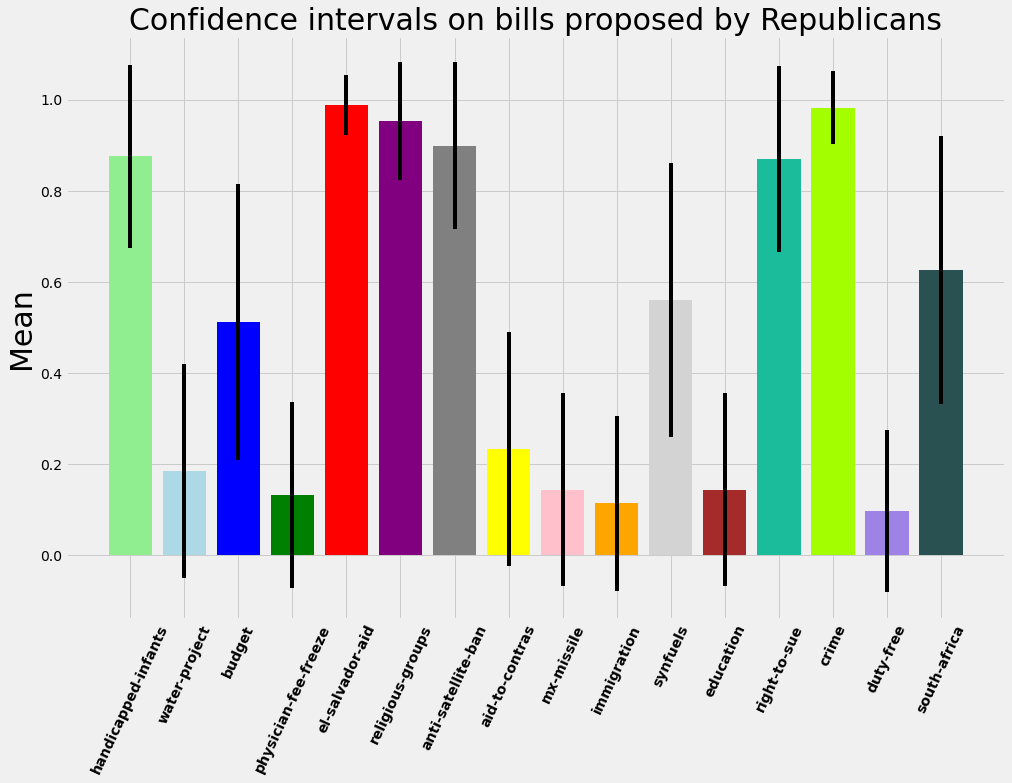

In [308]:
plt.style.use('fivethirtyeight')

# plt.set_facecolor('white')

plt.figure(figsize=(15,10))

plt.bar(0, height= confidence_interval(rep['education'], 0.95)[1], yerr= confidence_interval(rep['education'], 0.95)[3], label='Education', color='lightgreen')
plt.bar(1, height= confidence_interval(rep['handicapped-infants'], 0.95)[1], yerr= confidence_interval(rep['handicapped-infants'], 0.95)[3], label='Handicapped-Infants', color='lightblue')
plt.bar(2, height= confidence_interval(rep['water-project'], 0.95)[1], yerr= confidence_interval(rep['water-project'], 0.95)[3], label='water-project', color='blue')
plt.bar(3, height= confidence_interval(rep['budget'], 0.95)[1], yerr= confidence_interval(rep['budget'], 0.95)[3], label='budget', color='green')
plt.bar(4, height= confidence_interval(rep['physician-fee-freeze'], 0.95)[1], yerr= confidence_interval(rep['physician-fee-freeze'], 0.95)[3], label= 'physician-fee-freeze', color='red')
plt.bar(5, height= confidence_interval(rep['el-salvador-aid'], 0.95)[1], yerr= confidence_interval(rep['el-salvador-aid'], 0.95)[3], label='el-salvador-aid', color='purple')
plt.bar(6, height= confidence_interval(rep['religious-groups'], 0.95)[1], yerr= confidence_interval(rep['religious-groups'], 0.95)[3], label='religious-groups', color='grey')
plt.bar(7, height= confidence_interval(rep['anti-satellite-ban'], 0.95)[1], yerr= confidence_interval(rep['anti-satellite-ban'], 0.95)[3], label='anti-satellite-ban', color='yellow')
plt.bar(8, height= confidence_interval(rep['aid-to-contras'], 0.95)[1], yerr= confidence_interval(rep['aid-to-contras'], 0.95)[3], label='aid-to-contras', color='pink')
plt.bar(9, height= confidence_interval(rep['mx-missile'], 0.95)[1], yerr= confidence_interval(rep['mx-missile'], 0.95)[3], label='mx-missile', color='orange')
plt.bar(10, height= confidence_interval(rep['immigration'], 0.95)[1], yerr= confidence_interval(rep['immigration'], 0.95)[3], label='immigration', color='lightgrey')
plt.bar(11, height= confidence_interval(rep['synfuels'], 0.95)[1], yerr= confidence_interval(rep['synfuels'], 0.95)[3], label='synfuels', color='brown')
plt.bar(12, height= confidence_interval(rep['right-to-sue'], 0.95)[1], yerr= confidence_interval(rep['right-to-sue'], 0.95)[3], label='right-to-sue', color='#1abc9c')
plt.bar(13, height= confidence_interval(rep['crime'], 0.95)[1], yerr= confidence_interval(rep['crime'], 0.95)[3], label='crime', color='#a3ff00')
plt.bar(14, height= confidence_interval(rep['duty-free'], 0.95)[1], yerr= confidence_interval(rep['duty-free'], 0.95)[3], label='duty-free', color='#9e82e5')
plt.bar(15, height= confidence_interval(rep['south-africa'], 0.95)[1], yerr= confidence_interval(rep['south-africa'], 0.95)[3], label='south-africa', color='#295151')

# setting labels on x axis
plt.xticks(np.arange(16), df.columns[:][1:], rotation=65, fontweight='bold')

plt.grid(True)
plt.ylabel('Mean', fontsize= 30)
# plt.legend(loc='best')
plt.title('Confidence intervals on bills proposed by Republicans', fontsize=30)
plt.show()